In [1]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [2]:
import torch
print(torch.backends.mps.is_available())
print(torch.backends.mps.is_built())

True
True


In [3]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("mps")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
prompt = """dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans
"""

In [5]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans



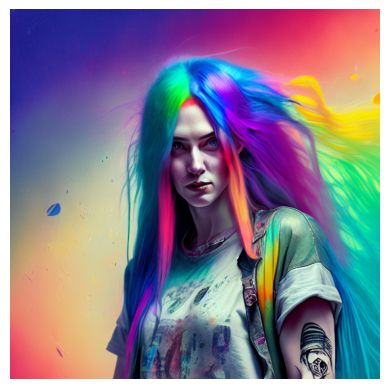

In [6]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [7]:
def generate_image_interface(prompt, negative_prompt, num_inference_steps=50, weight=640):
  params = {'prompt': prompt, 'num_inference_steps': num_inference_steps, 'num_images_per_prompt':2, 'height':int(1.2*weight),
            'weight': weight, 'negative_prompt': negative_prompt}

  img = pipe(**params).images
  return img[0],img[1]

In [8]:
import gradio as gr

In [9]:
demo = gr.Interface(generate_image_interface, inputs=["text","text",gr.Slider(1,100),gr.Slider(512,640)], outputs=["image","image"])

In [11]:
demo.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----

To create a public link, set `share=True` in `launch()`.
